# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Read Data

In [2]:
df=pd.read_csv("tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df['gender']=df['sex']
df.drop(columns=['sex'],inplace=True)

In [4]:
from sklearn import preprocessing

## Label Encoding

In [5]:
le=preprocessing.LabelEncoder()
df["gender"]=le.fit_transform(df["gender"])
df["smoker"]=le.fit_transform(df["smoker"])
df["day"]=le.fit_transform(df["day"])
df["time"]=le.fit_transform(df["time"])

In [6]:
df.head()

,total_bill,tip,smoker,day,time,size,gender
0,16.99,1.01,0,2,0,2,0
1,10.34,1.66,0,2,0,3,1
2,21.01,3.50,0,2,0,3,1
3,23.68,3.31,0,2,0,2,1
4,24.59,3.61,0,2,0,4,0


# Preprocess the Data

## Check if any null values are present

In [7]:
cols=df.columns

In [8]:
for i in df:
    print(i,"=",end="",sep="")
    print(df[i].isna().sum())

total_bill=0
tip=0
smoker=0
day=0
time=0
size=0
gender=0


## Since there are no null values we do not need to do any further preprocessing

# Visualize the data

In [9]:
cols

Index(['total_bill', 'tip', 'smoker', 'day', 'time', 'size', 'gender'], dtype='object')

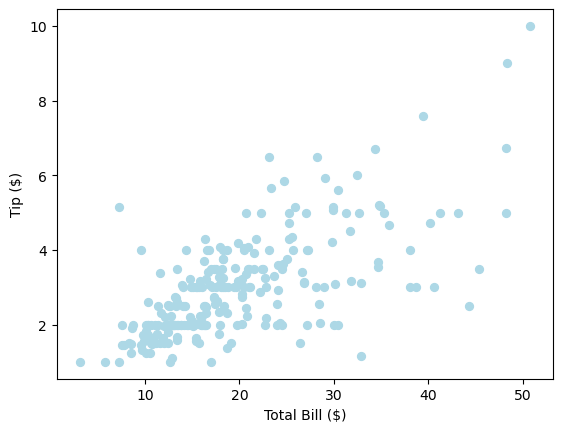

In [10]:
# Total Bill
# plt.subplot(3,2,1)
# plt.title("Total Bill vs Tip")
size=[0.1]
plt.scatter(df['total_bill'],df['tip'], color="lightblue", s=32)
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")

plt.show()

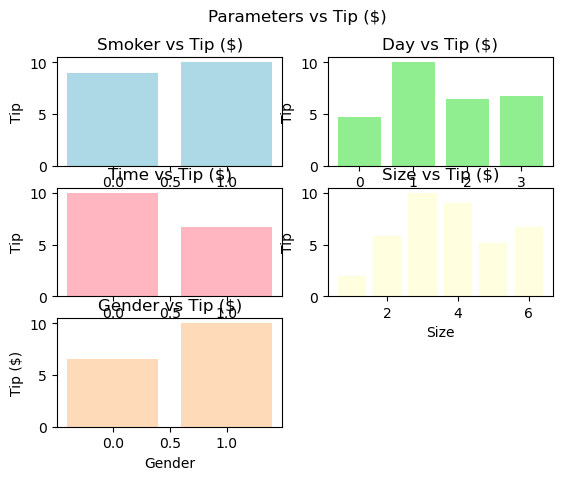

In [11]:
# Smoker
plt.subplot(3,2,1)
plt.title("Smoker vs Tip ($)")
size=[0.1]
plt.bar(df['smoker'],df['tip'], color="lightblue")
plt.xlabel("Smoker")
plt.ylabel("Tip")

# Day
plt.subplot(3,2,2)
plt.title("Day vs Tip ($)")
size=[0.1]
plt.bar(df['day'],df['tip'], color="lightgreen")
plt.xlabel("Day")
plt.ylabel("Tip")

# Time
plt.subplot(3,2,3)
plt.title("Time vs Tip ($)")
size=[0.1]
plt.bar(df['time'],df['tip'], color="lightpink")
plt.xlabel("Time")
plt.ylabel("Tip")

# Size
plt.subplot(3,2,4)
plt.title("Size vs Tip ($)")
size=[0.1]
plt.bar(df['size'],df['tip'], color="lightyellow")
plt.xlabel("Size")
plt.ylabel("Tip")

# Gender
plt.subplot(3,2,5)
plt.title("Gender vs Tip ($)")
size=[0.1]
plt.bar(df['gender'],df['tip'], color="peachpuff")
plt.xlabel("Gender")
plt.ylabel("Tip ($)")

plt.suptitle("Parameters vs Tip ($)")
plt.show()

# Split the Data

In [12]:
X=df[['total_bill','smoker','day','time','size','gender']]
Y=df['tip']

In [13]:
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.2)

# MultiLinear Regression

In [14]:
reg=linear_model.LinearRegression()

In [15]:
reg.fit(x_train,y_train)

LinearRegression()

# Test the data

In [16]:
y_pred=reg.predict(x_test)
# y_pred

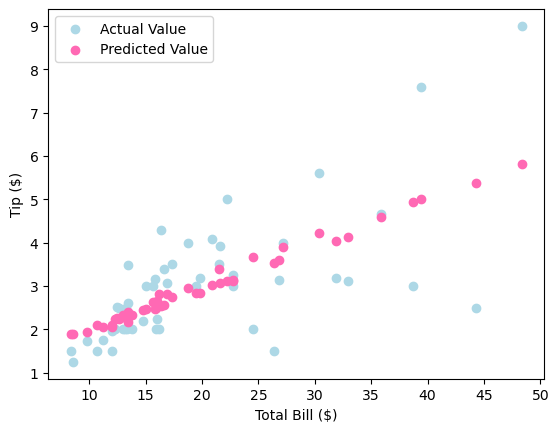

In [17]:
plt.scatter(x_test['total_bill'],y_test, color="lightblue")
plt.scatter(x_test['total_bill'],y_pred, color="hotpink")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.legend(["Actual Value","Predicted Value"])

plt.show()

In [18]:
print(f"The accuracy is: {math.ceil(reg.score(x_test,y_test)*10000)/100}%")

The accuracy is: 45.54%


## Taking User Input

In [19]:
# X=df[['total_bill','smoker','day','time','size','gender']]

list=[]
list.append(int(input("Enter Total Bill Value: ")))
list.append(int(input("Enter Smoker: ")))
list.append(int(input("Enter Day: ")))
list.append(int(input("Enter Time: ")))
list.append(int(input("Enter Size: ")))
list.append(int(input("Enter Gender: ")))

prediction=[list] # i/p

print(f"\n---------------------------------------------------------\nTip amount is ${reg.predict(prediction)[0].astype(int)}")

Enter Total Bill Value: 231
Enter Smoker: 0
Enter Day: 3
Enter Time: 2
Enter Size: 3
Enter Gender: 1

---------------------------------------------------------
Tip amount is $22


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
